#Exploración

In [92]:
## Import all libraries
#from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [93]:
#Windows
df = pd.read_excel(r"C:\Users\20344807257\Desktop\base_2012_2022_limpia.xlsx")
#MacOS
#df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")
#df.drop(df.columns[[0,1,2]],axis=1,inplace=True)
df["TIPO_OBRA"] = df["TIPO_OBRA"].astype(str)
serie_total = pd.DataFrame()
serie_barrios = pd.DataFrame()
for i in ["1","2","3"]:
    a = (df[df["TIPO_OBRA"] == i].groupby(['ANIO', 'TRIMESTRE']).size())
    serie_total.index = a.index
    serie_total[f"TIPO_OBRA_{i}"] = a.array
serie_total["TOTAL"] = serie_total["TIPO_OBRA_1"] + serie_total["TIPO_OBRA_2"] + serie_total["TIPO_OBRA_3"]
df.dropna(subset="TRIMESTRE", inplace=True)
df["DATE"] = df["ANIO"].astype(str) + "-" + df["TRIMESTRE"].astype(str)
df.dropna(subset="SUP_CONST",inplace=True)
df["BARRIOS"] = df["BARRIOS"].str.replace(",", ".")
df["BARRIOS"] = df["BARRIOS"].str.replace("NUNEZ", "NUÑEZ")
df = df[df["ANIO"]  != 2020]
print(df)

       Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  ANIO MES  TRIMESTRE  \
0                 0           0.0           7  2022   1        1.0   
1                 1           1.0           8  2022   2        1.0   
2                 2           2.0           9  2022   3        1.0   
3                 3           3.0          10  2022   1        1.0   
4                 4           4.0          11  2022   3        1.0   
...             ...           ...         ...   ...  ..        ...   
25521         21598           NaN       17841  2021   5        2.0   
25522         21599           NaN       17842  2012   8        3.0   
25523         21600           NaN       17843  2021   5        2.0   
25524         21601           NaN       17844  2021   4        2.0   
25525         21602           NaN       17845  2017   2        1.0   

                     FECHA                      DIRECCION TIPO_OBRA  \
0               3 ene 2022             GUARDIA VIEJA 3764         1   
1              25

In [94]:
##Agrupamiento de los datos por año y trimestre

<Axes: >

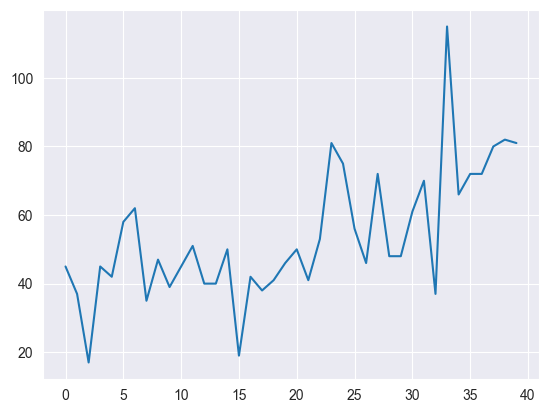

In [95]:
#Grouping of data by date
merge = pd.DataFrame()
for i in df["BARRIOS"].unique():
    b = (df[df["BARRIOS"] == i].groupby(['DATE']).size()).to_frame(name=i)
    
    merge= pd.merge(merge, b, how="outer", right_index = True, left_index = True)
    merge.fillna(0,inplace=True)
merge.reset_index(inplace=True)
merge["PALERMO"].plot(legend=None)

In [96]:
##Promedio móvil para disminuir varianzas estacionales y extraer tendencia

C:\Users\20344807257\AppData\Local\Temp\ipykernel_5200\2742227456.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  merge_mean = merge.rolling(4).mean()


<Axes: >

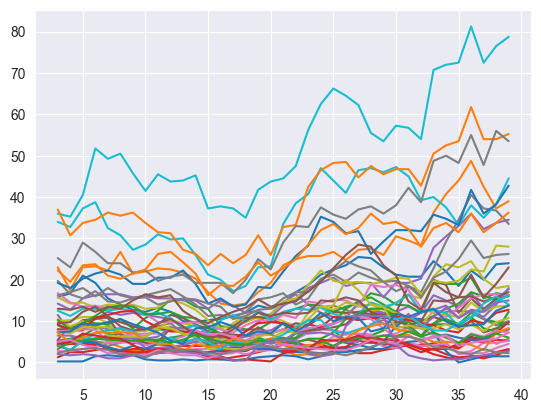

In [97]:
#Moving average of time series
merge_mean = merge.rolling(4).mean()
merge_mean.plot(legend=None)

In [98]:
#Normalización de cada barrio para que las tendencias sean comparables

     ALMAGRO  CONSTITUCION  SAN CRISTOBAL  SAN TELMO  BALVANERA  MONSERRAT  \
0        NaN           NaN            NaN        NaN        NaN        NaN   
1        NaN           NaN            NaN        NaN        NaN        NaN   
2        NaN           NaN            NaN        NaN        NaN        NaN   
3  -0.377562      0.939621      -0.936356   0.763521  -0.103995  -0.987774   
4  -0.175832      0.579352      -0.686210   1.277162  -1.661441  -1.968918   
5   0.681520      0.399217      -0.310992   1.277162  -1.111754   0.238657   
6   0.328493      0.759486       0.564518   1.020341  -0.470453   0.729229   
7  -0.427995      0.579352       0.814664   0.506700   0.170849   1.465087   
8  -0.730590     -0.141187      -0.185919  -0.520582  -0.103995   1.955659   
9  -0.982752     -0.861725      -0.561138  -0.777403   0.079234  -0.251915   
10 -1.083617     -0.681590      -1.061429  -0.777403  -0.103995  -0.497201   
11 -0.881887     -0.681590      -0.811283  -0.777403  -0.287224 

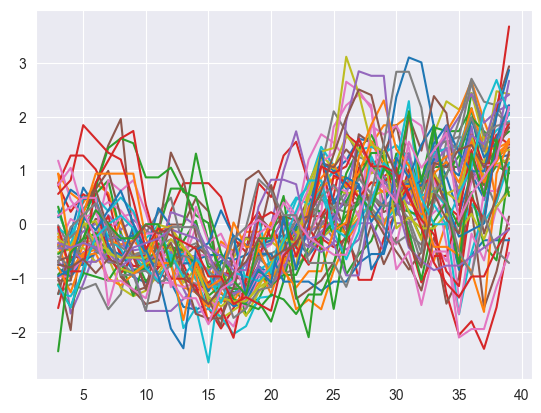

In [99]:
#Normalizing all time series by scoring
zscore_merge = zscore(merge_mean, nan_policy="omit")
zscore_merge.plot(legend=None)
print(zscore_merge)

In [100]:
##Regresiones para extraer la tendencia lineal de cada barrio.

,VILLA URQUIZA,COLEGIALES,FLORES,PALERMO,SAAVEDRA,VILLA DEVOTO
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.231439,-0.521596,-0.798012,-1.284483,-0.818194,-0.604630
4,-0.834485,-0.470540,-1.266011,-1.340638,-0.972021,-0.800298
5,-0.545023,-0.317373,-0.585286,-0.947553,-0.695132,-0.278518
6,-0.472657,-0.317373,-0.542740,-0.105227,-0.541305,-0.474185
7,-0.303805,-0.623708,-1.010739,-0.292411,-0.449009,-0.713335
8,-0.376170,-1.185320,-1.138375,-0.198819,-0.572071,-0.713335
9,-0.303805,-1.338488,-0.925648,-0.554468,-0.848959,-0.909002


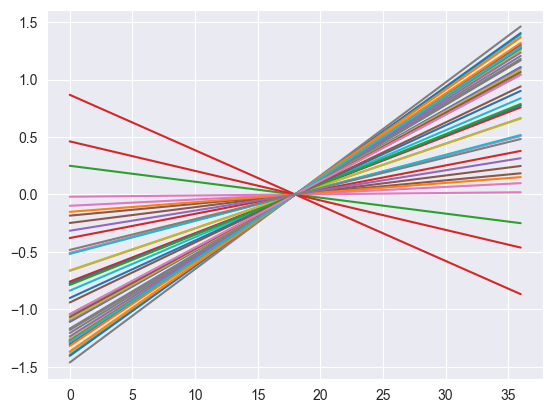

In [101]:
#Linear regression of each time series
regressor = LinearRegression()
regressions = pd.DataFrame()
coefficients= pd.DataFrame()
for i in zscore_merge.columns:
    y = zscore_merge[i].dropna()
    x = np.array(y.index).reshape(-1,1)
    regressor.fit(x, y)
    #plt.scatter(x,y)
    #plt.plot(x, regressor.predict(x))
    coefficients[i] = regressor.coef_
    regressions[i] = regressor.predict(x)

regressions.plot(legend=None)
coefficients = coefficients.T.sort_values(by=0)
head = zscore_merge[coefficients.head(6).index.array]
tail = zscore_merge[coefficients.tail(6).index.array]

coefficients
tail

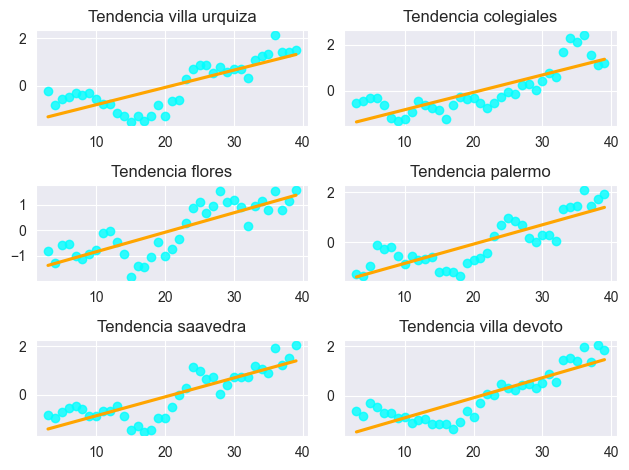

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=2)
# iterate over the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    #ax.plot(head.iloc[:,0])
    sns.regplot(x=tail.iloc[:,i].index, y = tail.iloc[:,i].array,data=tail.iloc[:,0],
                ax=ax, line_kws={'color': 'orange'}, scatter_kws={'color': 'cyan'}, ci=None)
    #print(head.iloc[i])
    ax.set_title(f"Tendencia {tail.columns[i].lower()}")

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

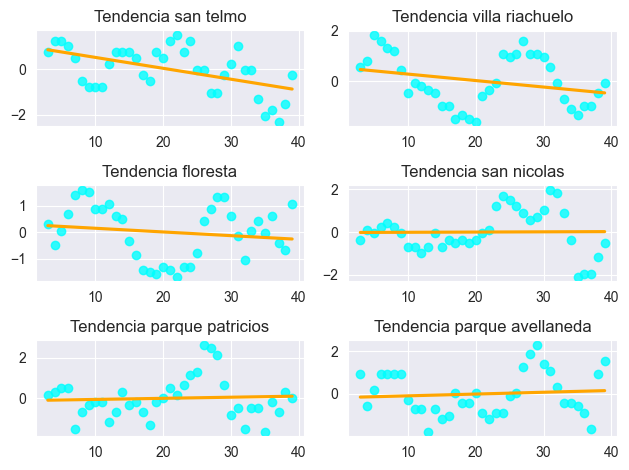

In [103]:
fig, axes = plt.subplots(nrows=3, ncols=2)
# iterate over the subplots and plot the data
for i, ax in enumerate(axes.flatten()):
    #ax.plot(head.iloc[:,0])
    sns.regplot(x=head.iloc[:,i].index, y = head.iloc[:,i].array,data=head.iloc[:,0],
                ax=ax, line_kws={'color': 'orange'}, scatter_kws={'color': 'cyan'}, ci=None)
    #print(head.iloc[i])
    ax.set_title(f"Tendencia {head.columns[i].lower()}")

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

#patial data points

In [104]:
#Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import folium
from folium.plugins import HeatMap
from shapely.geometry import MultiPolygon, Polygon
import fiona
from shapely.geometry import Point


#Managing the data

In [105]:
#Windows
df = pd.read_excel(r"C:\Users\20344807257\Desktop\base_2012_2022_limpia.xlsx")
#MacOS
#df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")
#Select 2022
df = df[df["ANIO"]  == 2022]
#Geojson barrios caba
GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)
#Point geometries from lat, long columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))
#Boundary of CABA
boundary = unary_union(geojson["geometry"]).exterior

#Removing false data

In [106]:
#Removing al points outside of the boundary

# perform spatial join
joined = gpd.sjoin(gdf, geojson, op='within')

# filter out points that do not intersect with the boundary
points_within_boundary = joined[joined.index_right.notnull()]
clean_df = points_within_boundary

C:\Users\20344807257\PycharmProjects\Trabajo\venv\Lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\20344807257\AppData\Local\Temp\ipykernel_5200\1641833338.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, geojson, op='within')


#Plotting the result over map of CABA

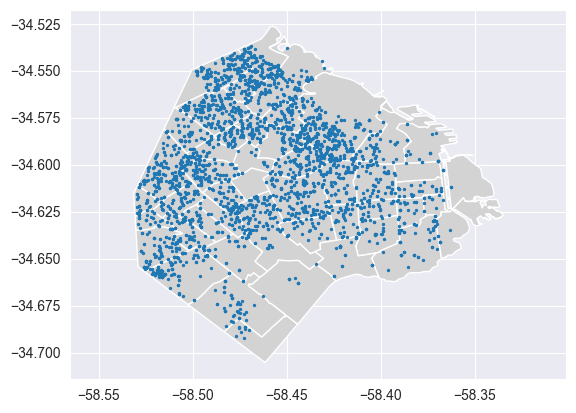

In [107]:

# Plot the geometry
#gdf.plot(marker='o', color='red', markersize=5)

#plt.show()


fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')

points_within_boundary.plot(ax=ax, markersize=2)
ax.set_aspect('equal', adjustable="datalim")
ax.autoscale(False)

plt.show()

#Folium

In [108]:
import io
from PIL import Image

m = folium.Map(location=[points_within_boundary.geometry.y.mean(), points_within_boundary.geometry.x.mean()], zoom_start=12)
points = [[geom.y, geom.x] for geom in points_within_boundary.geometry]
HeatMap(points).add_to(m)


# Add the GeoJSON representation of the points to the map
#folium.GeoJson(points_within_boundary.geometry).add_to(m)

# Display the map


img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

#Clustering

In [109]:
#libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [110]:
clean_df = clean_df[["Latitud","Longitud", "geometry"]]
clean_df

,Latitud,Longitud,geometry
0,-34.601221,-58.417228,POINT (-58.41723 -34.60122)
2,-34.609157,-58.426283,POINT (-58.42628 -34.60916)
4,-34.605103,-58.430465,POINT (-58.43047 -34.60510)
5,-34.602169,-58.417625,POINT (-58.41762 -34.60217)
6,-34.604811,-58.422539,POINT (-58.42254 -34.60481)
...,...,...,...
2635,-34.638144,-58.369439,POINT (-58.36944 -34.63814)
2636,-34.638144,-58.369439,POINT (-58.36944 -34.63814)
2637,-34.629936,-58.370455,POINT (-58.37045 -34.62994)
2638,-34.629936,-58.370455,POINT (-58.37045 -34.62994)


In [111]:
# Convert longitude and latitude to radians
clean_df['lat_rad'] = np.radians(clean_df['Latitud'])
clean_df['lon_rad'] = np.radians(clean_df['Longitud'])

# Standardize the data
scaler = StandardScaler()
clean_df[['lat_rad', 'lon_rad']] = scaler.fit_transform(clean_df[['lat_rad', 'lon_rad']])

# Compute the distances between all pairs of points
distances = haversine_distances(clean_df[['lat_rad', 'lon_rad']])

# Run the DBSCAN algorithm
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='precomputed')
labels = dbscan.fit_predict(distances)

# Add the cluster labels to the dataframe
clean_df['cluster'] = labels

# Visualize the clusters on a map
# Save the results to a file
#clean_df.to_file('clustered_data.shp')

C:\Users\20344807257\PycharmProjects\Trabajo\venv\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\20344807257\PycharmProjects\Trabajo\venv\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\20344807257\PycharmProjects\Trabajo\venv\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on 

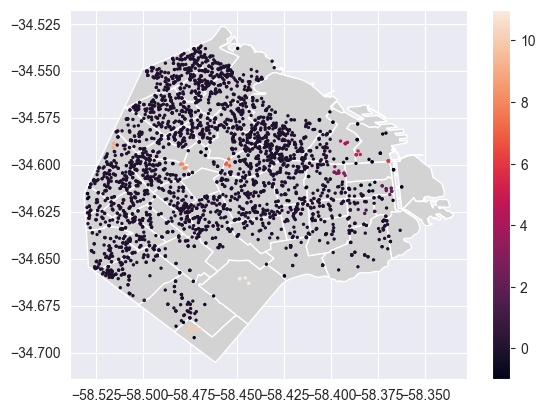

In [112]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
clean_df.plot(column="cluster", ax=ax, markersize=2, legend=True)
ax.set_aspect('equal', adjustable="datalim")
ax.autoscale(False)

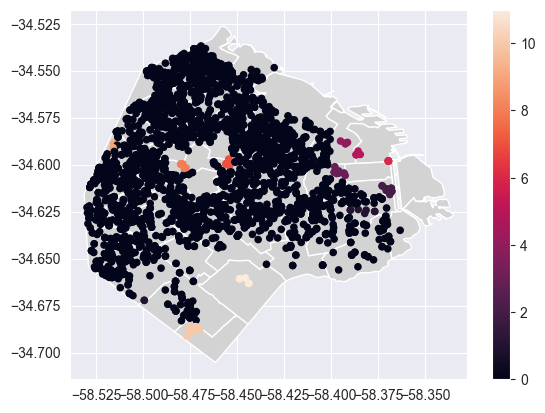

In [113]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
clean_df[clean_df["cluster"] != -1].plot(column="cluster", ax=ax, markersize=20, legend=True)
ax.set_aspect('equal', adjustable="datalim")
ax.autoscale(False)

In [114]:
clean_df[clean_df["cluster"] != -1]

,Latitud,Longitud,geometry,lat_rad,lon_rad,cluster
0,-34.601221,-58.417228,POINT (-58.41723 -34.60122),-0.012319,1.209647,0
2,-34.609157,-58.426283,POINT (-58.42628 -34.60916),-0.267416,0.971498,0
4,-34.605103,-58.430465,POINT (-58.43047 -34.60510),-0.137103,0.861483,0
5,-34.602169,-58.417625,POINT (-58.41762 -34.60217),-0.042797,1.199206,0
6,-34.604811,-58.422539,POINT (-58.42254 -34.60481),-0.127732,1.069970,0
...,...,...,...,...,...,...
1941,-34.640916,-58.368527,POINT (-58.36853 -34.64092),-1.288230,2.490536,0
2635,-34.638144,-58.369439,POINT (-58.36944 -34.63814),-1.199131,2.466545,0
2636,-34.638144,-58.369439,POINT (-58.36944 -34.63814),-1.199131,2.466545,0
2637,-34.629936,-58.370455,POINT (-58.37045 -34.62994),-0.935298,2.439833,0


In [115]:
clean_df[clean_df["cluster"] != -1].groupby("cluster").mean()

C:\Users\20344807257\AppData\Local\Temp\ipykernel_5200\1734519510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df[clean_df["cluster"] != -1].groupby("cluster").mean()


,Latitud,Longitud,lat_rad,lon_rad
cluster,,,,
0,-34.600274,-58.465394,0.018123,-0.057187
1,-34.634081,-58.407157,-1.068512,1.474521
2,-34.613248,-58.369691,-0.398888,2.459926
3,-34.604137,-58.396206,-0.106043,1.762550
4,-34.588498,-58.392697,0.396605,1.854843
5,-34.594302,-58.386095,0.210049,2.028471
6,-34.598067,-58.369600,0.089065,2.462313
7,-34.599502,-58.455124,0.042923,0.212938
8,-34.600433,-58.479100,0.013005,-0.417666


In [116]:
clusters = clean_df[clean_df["cluster"] != -1]

m = folium.Map(location=[points_within_boundary.geometry.y.mean(), points_within_boundary.geometry.x.mean()], zoom_start=12)
# Add the GeoJSON representation of the points to the map
folium.GeoJson(points_within_boundary.geometry).add_to(m)
clusters = clusters.set_crs('EPSG:4326')
folium.GeoJson(clusters.geometry, style_function=lambda x: {'color': 'red', 'weight': 1}).add_to(m)

# Display the map
m

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.